In [108]:

import pandas as pd
df = pd.read_csv('./titanic_data.csv')

In [99]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cateogry
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [100]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'cateogry'],
      dtype='object')

In [118]:
df['cateogry'] = df['who'].map({'man':1,'woman':2,'child':3})
df.rename(columns={'parch': 'WithParentsOrChildren'}, inplace=True)

In [119]:
df.head()

,survived,pclass,sex,age,sibsp,WithParentsOrChildren,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cateogry
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [103]:
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
cateogry         int64
dtype: object

In [120]:
df1 = df[['survived','who','embark_town', 'age', 'fare', 'WithParentsOrChildren']]

In [121]:
df1.head()

,survived,who,embark_town,age,fare,WithParentsOrChildren
0,0,man,Southampton,22.0,7.2500,0
1,1,woman,Cherbourg,38.0,71.2833,0
2,1,woman,Southampton,26.0,7.9250,0
3,1,woman,Southampton,35.0,53.1000,0
4,0,man,Southampton,35.0,8.0500,0


In [122]:
df1.dtypes

survived                   int64
who                       object
embark_town               object
age                      float64
fare                     float64
WithParentsOrChildren      int64
dtype: object

In [123]:
results = df1.groupby(['who','embark_town']).mean()

In [124]:
results

survived        age       fare  WithParentsOrChildren
who   embark_town                                                       
child Cherbourg    0.777778   8.245556  17.289594               0.722222
      Queenstown   0.200000   7.200000  24.905840               0.800000
      Southampton  0.566667   5.737500  38.091318               1.466667
man   Cherbourg    0.288889  34.960938  50.023568               0.233333
      Queenstown   0.083333  39.500000  12.309606               0.027778
      Southampton  0.144254  32.616071  20.516266               0.146699
woman Cherbourg    0.883333  33.750000  87.649373               0.450000
      Queenstown   0.742857  25.136364  12.766551               0.228571
      Southampton  0.712644  31.716561  38.821098               0.678161

In [125]:
import plotly.graph_objs as go
import numpy as np

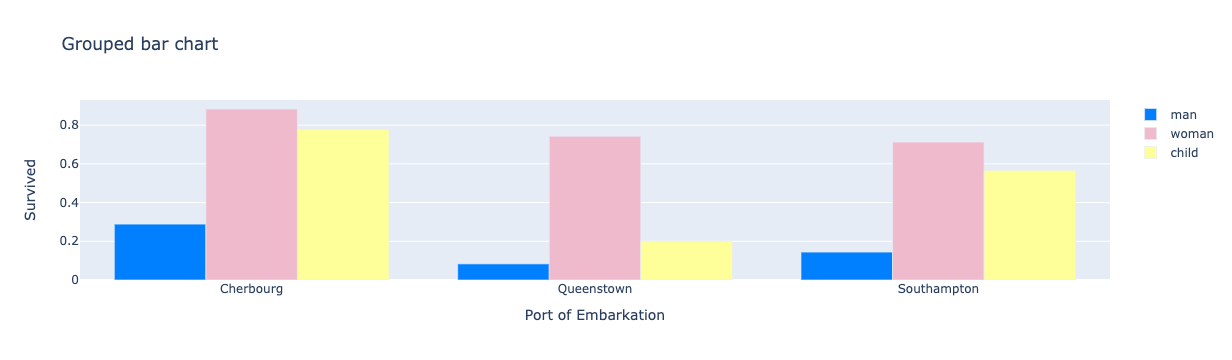

In [126]:
    mydata1 = go.Bar(
        x=results.loc['man'].index,
        y=results.loc['man']['survived'],
        name='man',
        marker=dict(color='#007FFF')
    )
    mydata2 = go.Bar(
        x=results.loc['woman'].index,
        y=results.loc['woman']['survived'],
        name='woman',
        marker=dict(color='#EFBBCC')
    )
    mydata3 = go.Bar(
        x=results.loc['child'].index,
        y=results.loc['child']['survived'],
        name='child',
        marker=dict(color='#FFFF99')
    )
    mylayout = go.Layout(
        title='Grouped bar chart',
        xaxis = dict(title = 'Port of Embarkation'), # x-axis label
        yaxis = dict(title = 'Survived'), # y-axis label

    )
    fig = go.Figure(data=[mydata1, mydata2, mydata3], layout=mylayout)
    fig

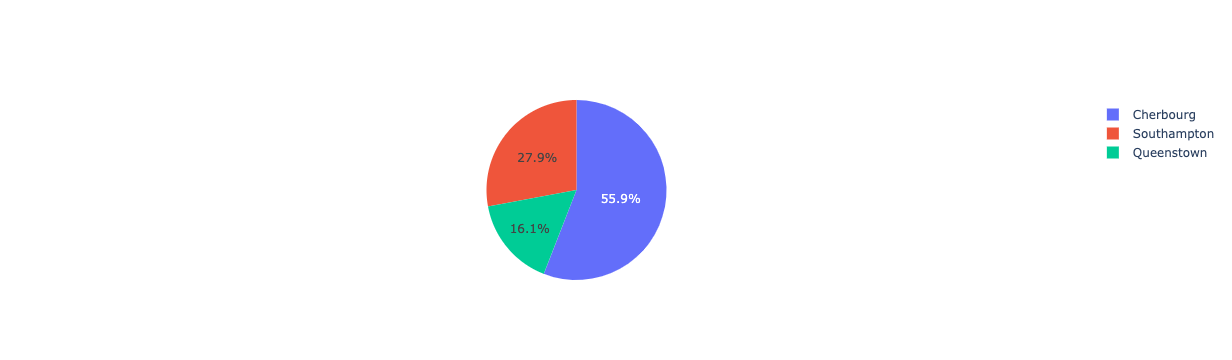

In [117]:
    mydata1 = go.Bar(
        x=results.loc['man'].index,
        y=results.loc['man']['survived'],
        name='man',
        marker=dict(color='#007FFF')
    )

    piedata1 = [go.Pie(labels=results.loc['man'].index, 
               values=results.loc['man']['survived'])]
    df, values="sepal_width", names="species")
    
    mydata2 = go.Bar(
        x=results.loc['woman'].index,
        y=results.loc['woman']['survived'],
        name='woman',
        marker=dict(color='#EFBBCC')
    )
    mydata3 = go.Bar(
        x=results.loc['child'].index,
        y=results.loc['child']['survived'],
        name='child',
        marker=dict(color='#FFFF99')
    )
    mylayout = go.Layout(
        title='Grouped bar chart',
        xaxis = dict(title = 'Port of Embarkation'), # x-axis label
        yaxis = dict(title = 'Survived'), # y-axis label

    )
    #fig = go.Figure(data=[mydata1, mydata2, mydata3], layout=mylayout)
    fig = go.Figure(piedata1)
    fig